In [1]:
import os

import numpy as np
import cv2
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt

#Malayalam letters mapping.
# import importlib
# import encoding
# importlib.reload(encoding)

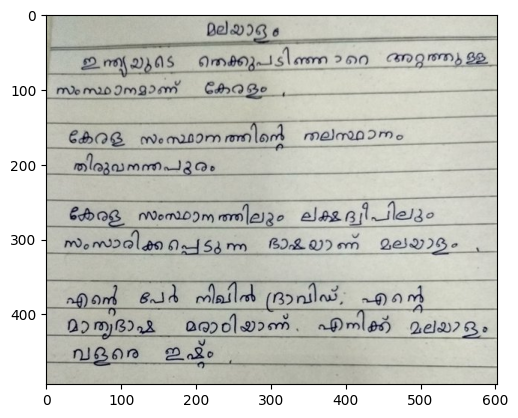

In [2]:
img = cv2.imread('mal-hw.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img);

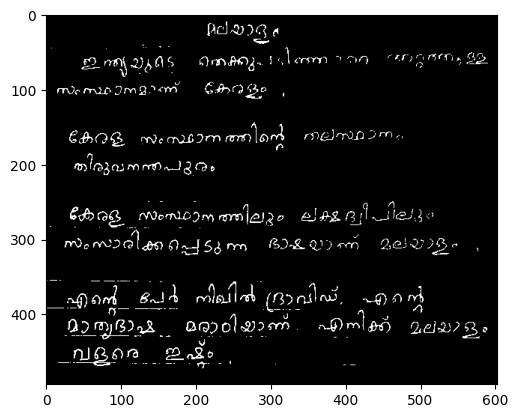

In [3]:
def thresholding(image):
    img_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_grey,95,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh,cmap='gray')
    return thresh

thresh_img = thresholding(img)

## Line Segmentation

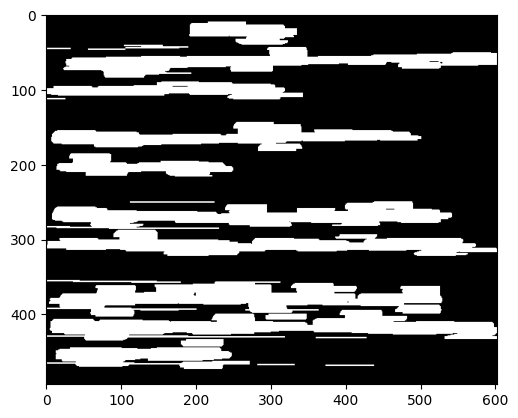

In [4]:
# dilation
kernel = np.ones((2,50),np.uint8)
dilated_img = cv2.dilate(thresh_img,kernel,iterations = 1)
plt.imshow(dilated_img,cmap='gray')

In [5]:
type(dilated_img)

numpy.ndarray

In [6]:

(contours,hierarchy) = cv2.findContours(dilated_img.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours,key = lambda ctr : cv2.boundingRect(ctr)[1])

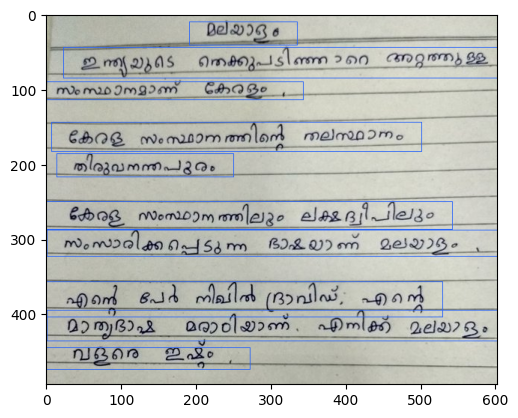

In [14]:
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    if cv2.contourArea(ctr)<500:
        continue

    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w,y+h),(40, 100, 250) ,1)

plt.imshow(img2)

## Word Segmentation

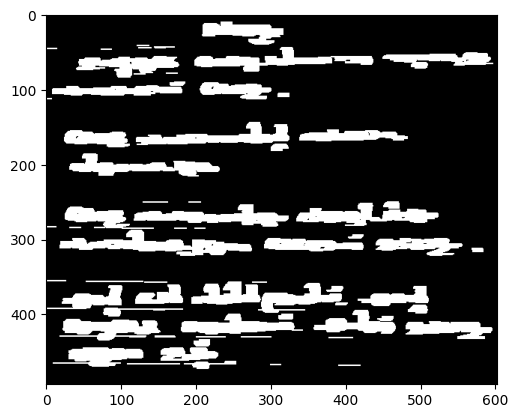

In [7]:
# dilation
kernel = np.ones((2,15),np.uint8)
dilated2_img = cv2.dilate(thresh_img,kernel,iterations = 1)
plt.imshow(dilated2_img,cmap='gray')

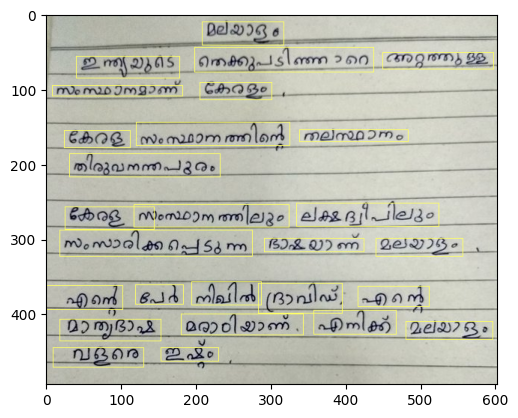

In [8]:
img3 = img.copy()
word_list = []

for line in sorted_contours_lines:

    # roi of each line
    x,y,w,h = cv2.boundingRect(line)
    roi_line = dilated2_img[y:y+h,x:x+w]

    # draw contours on each word
    (cnt,hierarchy) = cv2.findContours(roi_line.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    sorted_contours_words = sorted(cnt,key = lambda cntr : cv2.boundingRect(cntr)[0])

    for word in sorted_contours_words:

        if cv2.contourArea(word)<600:
            continue
            
        x2,y2,w2,h2 = cv2.boundingRect(word)
        word_list.append([x+x2,y+y2,x+x2+w2,y+y2+h2])
        cv2.rectangle(img3, (x+x2,y+y2), (x+x2+w2,y+y2+h2), (255, 255, 100) ,1)

plt.imshow(img3)


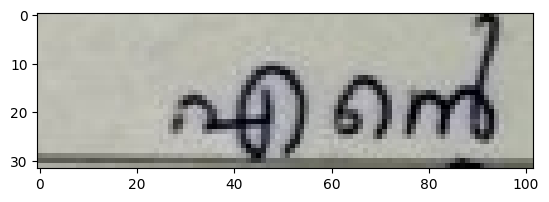

In [17]:
ith_word = word_list[16]
roi_ith = img[ith_word[1]:ith_word[3],ith_word[0]:ith_word[2]]
plt.imshow(roi_ith)

## Character Segmentation

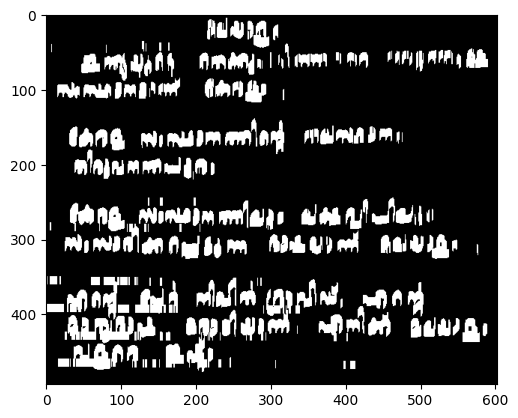

In [9]:
# dilation
kernel = np.ones((3,1),np.uint8)
dilated3_img = cv2.dilate(thresh_img,kernel,iterations = 5)
plt.imshow(dilated3_img,cmap='gray')

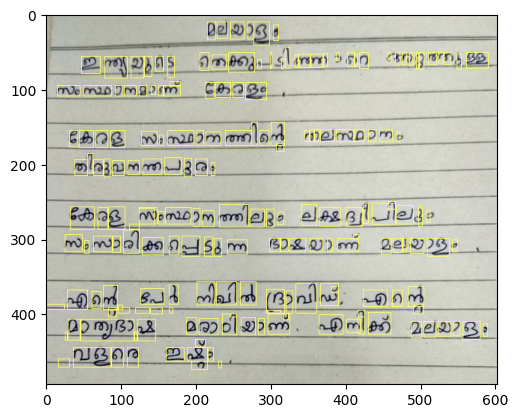

In [19]:
img4 = img.copy()
char_list = []


for line in sorted_contours_lines:
    # roi of each line
    x,y,w,h = cv2.boundingRect(line)
    roi_line = dilated2_img[y:y+h, x:x+w]

    # draw contours on each word
    (contours, _) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours_words = sorted(contours, key=lambda cntr: cv2.boundingRect(cntr)[0])

    for word in sorted_contours_words:
        # roi of each word
        x1, y1, w1, h1 = cv2.boundingRect(word)
        roi_word = dilated3_img[y+y1:y+y1+h1, x+x1:x+x1+w1]  # Corrected ROI indexing

        # draw contours on each character
        (char_contours, _) = cv2.findContours(roi_word.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        sorted_contours_chars = sorted(char_contours, key=lambda cntr: cv2.boundingRect(cntr)[0])

        for char in sorted_contours_chars:
            if cv2.contourArea(char) < 20:
                continue

            x2, y2, w2, h2 = cv2.boundingRect(char)
            char_list.append([x+x1+x2, y+y1+y2, x+x1+x2+w2, y+y1+y2+h2])  # Corrected bounding box coordinates
            cv2.rectangle(img4, (x+x1+x2, y+y1+y2), (x+x1+x2+w2, y+y1+y2+h2), (255, 255, 100), 1)  # Corrected rectangle coordinates

plt.imshow(img4)
